# Why Analyze Algorithm?
* Procedure or formula for solving a problem
* Some are so useful they have names:<br>merge sort, bubble sort etc...
* How can we compare the algos to know which is better

In [1]:
# Imagine I come up with a function...

def sum1(n):
    '''
    Take an input of n and return the sum of th numbers from 0 to n
    '''
    final_sum = 0
    for x in range(n+1):
        final_sum += x
    
    return final_sum 

In [2]:
sum1(5)

15

In [3]:
# And you came up with this function...

def sum2(n):
    '''
    Take an input of n and rturn the sum of the numbers from 0 to n
    '''
    return (n*(n+1))/2

Function sum1 uses for loop to iteratively add across range 0 to n<br>
Function sum2 uses formula to solve the problem

## Objectively Compare Them
* memory space
* time to run

In [4]:
# built in magic commands in notebook
%timeit sum1(100)
# result in microseconds

8.39 µs ± 69.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
%timeit sum2(100)
# result in nanoseconds

238 ns ± 2.44 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


MICRO = `10^-6`<br>
NANO = `10^-9`

Smaller number is obviously better

* **Cannot simply rely on time to  run because all computers are different and some faster than others**
* **To be hardware independent = Big O**

# Big O
objectively compare th efficinty of these two algorithm
* compare the number of assignments each algorithm makes
The original `sum1` function will create an assignment `n+1` times, we can see this from the range based function. This means it will assign the `final_sum` variable n+1 times, We can say that for a problem of n size (in this case just a number n) this function will take `1+n` steps

This `n` notation allows us to compare solutions and algorithm relative to the size of the problem, since `sum1(10)` and `sum1(1000000)` would take very different times to run but be using the same algorithm. We can note that as n grows very large, the +1 won't have much effect. So let's begin discussing how to build a syntax for this notation.

Big-O notation dscribes **how quickly runtime will gro relative to the input as the input get arbitrarily large**

## HOW WELL IT CAN SCALE as data increases?
Remember, we want to **compare how quickly runtime will grow**, not compare exact runtime, since those can vary depending on hardware

Since we want to compare for a variety of input sizesm we are only concerned with the runtime grow relative to the input. This is why we use `n` for notation.

As `n` gets arbitrarily large we only worry ablut terms that grow the fastest as `n` gets large, to this point, Big-O analysis is also known as **asymptotic analysis**.

In maths, asymptotic analysis = **describing limiting behavior**
* which part of the algorithm has the GREATEST effect on the final answer, which part of algo is the real bottleneck, which part is the limiting factor.

As of the syntax sum1() can be said to be O(n) since its runtime grows linearly with the input size


In [6]:
def Bigo(n):
    return 45*n**3 + 20*n**2 + 19

In [7]:
Bigo(1)

84

In [8]:
Bigo(2)
# starting to see that the 19 will not be a scaling or limiting factor

459

In [9]:
Bigo(10)

47019

* It can be seen that the `19` doesn't hold much weight anymore
* The `20n**2` in this case is *2000*
* The `45n**3` in this case is *45,000*

### The part of the algo that really has a lot to do with the final answer as data scales, will not be the 45 but the n3. So this algo has an order of O(n**3)

## Big-O complexity chart

Text(0.5, 0, 'n')

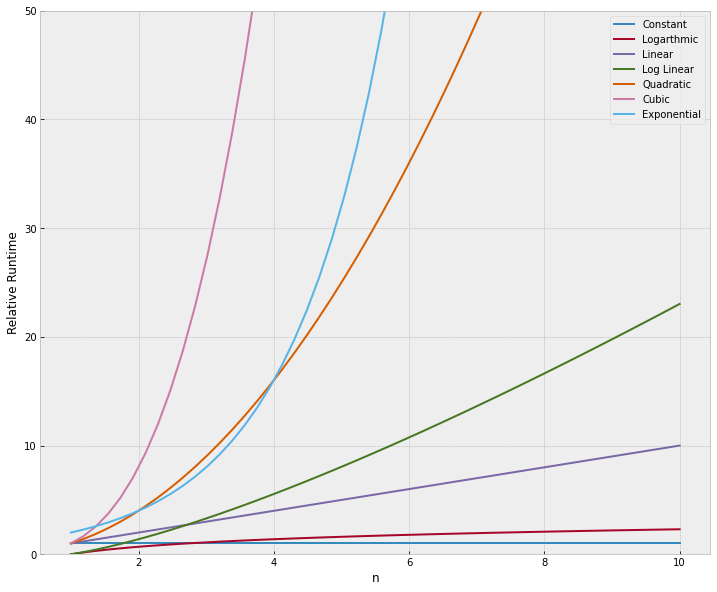

In [10]:
from math import log
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1, 10)
labels = ['Constant', 'Logarthmic', 'Linear', 'Log Linear', 'Quadratic', 'Cubic', 'Exponential']
big_o = [np.ones(n.shape), np.log(n), n, n*np.log(n), n**2, n**3, 2**n]

# Plot
plt.figure(figsize = (12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n, big_o[i], label = labels[i])
    
plt.legend(loc = 0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')

Clearly we want to choose algorithm that stays away from any exponntial, quadratic, or cubic behavior!

## Big-O Examples

### O(1) Constant

In [11]:
def func_constant(values):
    '''
    Prints first item in the list of values
    '''
    print (values[0])
    
func_constant([1,2,3])

1


It doesn't matter how large my values list becomes, the function/algo will only grab the indexed position `0` in that list

### O(n^2) Quadratic

In [12]:
def func_quad(lst):
    '''
    Prints pairs for every item in list
    '''
    for item_1 in lst:
        for item_2 in lst:
            print(item_1, item_2)
            
lst = [1, 2, 3]

func_quad(lst)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


* two loops, one nested inside another
* For a list of `n` items, we will have to perform `n` opreations for every item in the list! This means in total, we will perform `n` times `n` assignment, or `n^2`.So a list of `10` items have `100` operations. you can see how dengerous this can get for a large inputs! This is why Big-O is so important to be aware of!
* hence, the input of `3` gives us `9` output iterations

## Calculating Scale of Big-O
insignificant terms drop out of Big-O notation

When it comes to Big-O notation we only care about the most significant terms, remember as the input grows larger only the fastest growing term will matter.
* Like taking limit towards Infinity

In [13]:
def print_1(lst):
    '''
    Prints all items once
    '''
    for val in lst:
        print(val)
        
print_1(lst)

# can you see how this growth is linear to the input?
# O(n)

1
2
3


In [14]:
 def print_3(lst):
        '''
        Print all items three times
        '''
        for val in lst:
            print(val)
            
        for val in lst:
            print(val)
            
        for val in lst:
            print(val)

print_3(lst)

1
2
3
1
2
3
1
2
3


This algo will run `3` times for each `n`, so this becomes an order of `3(n)`. It is still linear.<br>More importantly, `1(infinity)` is not really differnt than `(infinity)` and We can drop insignificant constants.

So this too is `O(n)`

In [15]:
def comp(lst):
    '''
    This function prints the first item O(1) it is a constant
    Then it prints the first 1/2 of the list O(n/2)
    Then prints a string 10 times O(10) ti is a constant
    '''
    print(lst[0])
    
    midpoint = len(lst)//2
    
    for val in lst[:midpoint]:
        print(val)
        
    for x in range(10):
        print('number')

In [16]:
lst = [1,2,3,4,5,6,7,8,9,10]
comp(lst)

1
1
2
3
4
5
number
number
number
number
number
number
number
number
number
number


### O(1 + n/2 + 10)
As `n` gets larger and larger (scales up) you can see rasily how the `1` and the `10` quickly begin to mean nothing.<br>
And the `//2` will begin to hav no effect either<br>
End up with `O(n)`

## Worst Case vs Best Case
Many times we are only concerned with the worst possible case of the algorithm, but in an interview setting its is important to keep in mind that worst case and best caes scenarios may be completely different Big-O times

In [17]:
def matcher(lst, match):
    '''
    Given a list lst, return a boolean indicating if match item is in the list
    '''
    for item in lst:
        if item == match:
            return True
    return False

In [18]:
lst

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [19]:
matcher(lst, 1) # this is best case because item seeked is index 0, O(1) Best case becoms a constant

True

In [20]:
matcher(lst, 20) # worst case, entire list must be searched, n element, O(n) Worst case becomes linear

False

## Space Complexity
Also concerned with how much memory/space an algorithm uses. The notation of space complexity is the same, but instead of checking the time of operations, we check the size of the allocation of memory

In [21]:
def memory(n = 10):
    '''
    Prints "Memory!" n times
    '''
    for x in range(n): # TIME COMPLEXITY O(n)
        print('Memory!') # SPACE COMPLEXITY O(1)

memory(10)

Memory!
Memory!
Memory!
Memory!
Memory!
Memory!
Memory!
Memory!
Memory!
Memory!


`O(n)` for time complexity but what about space complexity<br>
In memory it doesn't need to store `10` Versions of "Memory!". It only need to store one string. `O(1)`